In [ ]:
# 참고 URL
# https://www.youtube.com/watch?v=oy5BGW8D5wc&list=WL&index=41&ab_channel=%EC%96%84%ED%8C%8D%ED%95%9C%EC%BD%94%EB%94%A9%EC%82%AC%EC%A0%84

In [1]:
# 모듈 로드
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 주어진 데이터 입력
# 아래 리스트에 생성된 데이터를 대체해 넣으세요.
# 적당히 비례적으로 늘어나는 숫자.
# https://github.com/POPCORN-DOG/Tensorflow/blob/main/Node.js/random_number.js
# Node.js를 활용한 랜덤 숫자 생성
# 보통 주어진 데이터에서 y=ax+b의 관계식으로 풀어볼 때 가장 적합한 관계식
# a와 b값을 찾아낼 수 있을까 알아보자. 

# 증명을 위해 y = 3.2x + 256을 기준으로 한 node.js를 만들어 증명되는지 확인해 보자.
x = [21.1,0.8,2.3,19,0.6,1.4,19.9,6,22,16.4,17.2,23.4,19.4,0.4,11.6,22.2,12.2,22,24,20,3,9.3,7,4.6,16.6,4.3,13,20.2,14.5,24.4,5.3,14.2,0.7,22.4,17.9,23.5,1.4,15.2,17.4,19,16.9,9.8,12.1,1.5,24.6,14.8,14.2,4.9,10.4,8,6.8,23.3,
23.2,14.7,20.1,18.6,0.9,15.2,18.9,11,18.4,1.4,19.7,18.1,22.7,9.7,0.9,22.2,4.9,22.5,14.1,13.9,20.2,15,6.2,21.8,3.4,16.4,13.2,16.6,21.5,24.8,20.6,2.4,5.4,0.3,11.5,3.7,22.9,22.2,7.3,2.8,3.3,19.6,21.1,11.3,17.5,18.5,5.6,5.8]

y = [323.5,258.8,263.4,318,258,260.4,321,274.1,327.9,310.5,309.7,333.6,316.6,256.4,292.6,327,293.1,323.5,332.5,318.5,266,287.7,276.6,271.7,308.4,270.6,296.2,320.9,299.3,331.1,273.8,299.5,258.5,327.7,314.6,332.8,259.7,303.5,
     314.7,315.7,310.2,286.3,296.1,260.7,334.3,302.3,300.3,270.8,288.5,280.6,277.3,334.7,333.7,301.4,318.2,314.3,259.9,305.4,316.7,291.1,313.8,260.4,318.6,311.1,325.1,285.4,257.7,329,273,326.5,301.6,299.2,321.9,305,275.5,321.9,
     267.2,308.8,298.4,308.5,323,338.2,317.9,263.4,273.2,257.5,291,267.1,329.4,323.1,279.6,265.6,267.6,319.6,322.1,291.1,311.8,316.2,274.3,274.3]

# python의 경우 random 모듈을 사용하자
# randint(최소, 최대) : 입력 파라미터인 최소부터 최대까지 중 임의의 정수를 리턴한다
# random() : 0 부터 1 사이의 부동소수점(float) 숫자를 리턴한다
# uniform(최소, 최대) : 입력 파라미터인 최소부터 최대까지 중 임의의 부동소수점(float) 숫자를 리턴한다
# randrange(시작,끝[,간격]) : 입력 파라미터인 시작부터 끝값까지 (지정된 간격으로 나열된) 숫자 중 임의의 정수를 리턴한다
import random 
z = [round(random.uniform(1.0, 36.5),1) for r in range(100)]
# from random import *
# z = [round(uniform(1.0, 36.5),1) for r in range(100)]

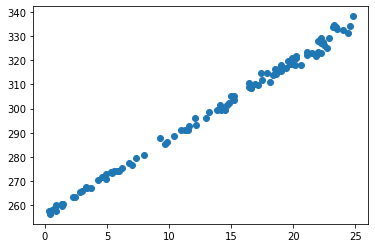

In [3]:
# 데이터 시각화
plt.scatter(x,y,label='input data set')

In [4]:
# 예를 들어 알을 막 까고 나온 새끼들의 키를 하루 간격으로 재보자

# (0,0)이 부화, y = 키, x = 나이(시간)
# 계속 자란다고 예상할 떄 y=ax+b (a기울기,b는 x가 0일때의 y값 y절편) 
# 라는 1차 함수식을 바탕으로 오차가 가장 적은 직선을 그려서
# 30일 정도에 키가 얼만치 되겠구나 예상할 수 있게된다.

# 즉 여기서 선형 회귀(Linear regression) 통계학 기법을 사용해서 
# 이 데이터들을 설명하기 가장 적합한 x, y의 관계식을 찾아보자

# 1. 순수 tensorflow2.0로 코딩하기

In [5]:
# 1. 관계식을 나타내는 클래스.
# 선형 모델 클래스 
class LinearModel:
    # 2) 이렇게 1차 함수 형태임을 나타내자.
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    # 1) weight와 bias를 임의값(tf.Variable(0.))으로 초기화하고
    def __init__(self):
        self.Weight = tf.Variable(0.)
        self.Bias = tf.Variable(0.)

In [6]:
# 오차(손실) 구하기 함수
def loss(y, pred):
    # 3) 현재 관계식으로 예상된 값(pred)과 y의 차이를
    # 4) 오차가 + 혹은 - 일 수도 있기 때문에 절대값을 구하기 위해 제곱(square)한 다음 
    # 5) mean 평균을 구한다.
    return tf.reduce_mean(tf.square(y - pred))

In [7]:
# 학습 함수
# 6) 관계식의 형태와 x배열, y배열의 데이터, 그리고 직선을 얼마만큼씩 움직여 볼지를
# 7) 결정하는 가중치(lr)를 인자들로 받아온다. (여기서는 0.003인데) 이 수치가 너무 높으면
# 8) 정확한 값을 찾기 어려울 수 있고 조정하다가 수치가 이상한 쪽으로 튀어버리기도 한다.
# 9) 반대로 너무 낮으면 적정값에 도달하는데 시간이 오래 걸리기 때문이다.
def train(linear_model, x, y, lr):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    # 10) 이렇게 train이 한 번 이뤄질 때마다 이 gradient decent(경사하강법)란 방법으로
    # 11) 이 손실값(current_loss), 오차가 최소한으로 줄어들어서 데이터들에 최적의 관계식이 만들어질떄까지
    # 12) 모델의 weight과 bias가 조정되는것이다.
    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

In [8]:
# 학습 진행
# 13) 마지막으로 이것들을 실행하는 코드이다.
# 14) 관계식 클래스의 객체를 만들고
linear_model = LinearModel()
# 15) 학습횟수는 1000정도로 해보자
# 1차 1000, 2차 5000로 해보자. 
# w의 weight값 b의 bias값이 y= 3.2x + 256에 가까워지는지 확인해보자.
epochs = 5000

# 16) for문을 그 횟수만큼 돌리면서 
for epoch_count in range(epochs + 1):
    # 17) 현 상태의 오차값들을 구하고
    real_loss = loss(y, linear_model(x))
    # 18) 이를 토대로 직선의 위차와 기울기를 조정하는 것이다.
    train(linear_model, x, y, lr=0.003)
    # 100회에 한번씩 그 경과를 출력해 보도록 하자.
    if epoch_count % 100 == 0:
        print(f"{epoch_count}:: W:{linear_model.Weight.numpy()} b:{linear_model.Bias.numpy()} Loss: {real_loss.numpy()} ")

0:: W:25.04288101196289 b:1.7907298803329468 Loss: 89680.90625 
100:: W:15.519984245300293 b:36.69625473022461 Loss: 12032.8984375 
200:: W:13.808283805847168 b:67.12155151367188 Loss: 8924.7509765625 
300:: W:12.334185600280762 b:93.323486328125 Loss: 6619.60546875 
400:: W:11.064711570739746 b:115.88827514648438 Loss: 4910.00732421875 
500:: W:9.971455574035645 b:135.32077026367188 Loss: 3642.09375 
600:: W:9.029956817626953 b:152.05581665039062 Loss: 2701.75146484375 
700:: W:8.21915054321289 b:166.46780395507812 Loss: 2004.3525390625 
800:: W:7.520893573760986 b:178.87925720214844 Loss: 1487.1295166015625 
900:: W:6.919555187225342 b:189.56797790527344 Loss: 1103.5289306640625 
1000:: W:6.4016947746276855 b:198.77288818359375 Loss: 819.0367431640625 
1100:: W:5.955722808837891 b:206.6999969482422 Loss: 608.0457763671875 
1200:: W:5.571655750274658 b:213.52674865722656 Loss: 451.5648193359375 
1300:: W:5.240902900695801 b:219.40585327148438 Loss: 335.5117492675781 
1400:: W:4.956061

# 2. keras를 사용한 코드

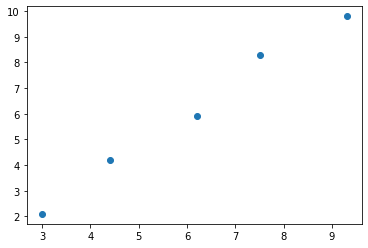

In [9]:
# 모듈 로드
import tensorflow as tf
import matplotlib.pyplot as plt

# 주어진 데이터 입력
# 아래 리스트에 생성된 데이터를 대체해 넣으세요.
x = [3, 4.4, 6.2, 7.5, 9.3]
y = [2.1, 4.2, 5.9, 8.3, 9.8]

# 데이터 시각화
plt.scatter(x, y, label="input data set")

In [ ]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])

model = tf.keras.Sequential([layer0])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.5))

history = model.fit(x, y, epochs=5000, verbose=True)

weights = layer0.get_weights()
print('weight: {} bias: {}'.format(weights[0], weights[1]))

print('Prediction: {}'.format(model.predict([7])))

## (번외) 난수 생성 후 맞추기 놀이

In [ ]:
from random import randint
 
n = randint(1, 100)
 
while True:
    ans = input("Guess my number (Q to exit): ")
    if ans.upper() == "Q":
        break
    ians = int(ans)
    if (n == ians):
        print("Correct!")
        break
    elif (n > ians):
        print("Choose higher number")
    else:
        print("Choose lower number")